# PyCity Schools Analysis

* Based on the assumption that math scores are graded on the same scale, the Charter schools out-perform the District schools.
* Based on the assumption that reading scores are graded on the same scale, the Charter schools out-perform the District schools.
* The passing rate for Charter schools for both reading and math out-perform Disctrict schools (again, assuming a uniform grading scale.)

In [1]:
# Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

# Note On The Comparison Between "Charter" and "District" School scores.

The sample suggests (rather strongly) that the grading scale used by schools of type "Charter" and "District" are *distinct*.  For example, the "Charter" schools seem to only report Math sorces in the range  $[68, 100]$, where as schools of type "District" report scores in the range $[55,100]$; moreover since the scores are have the same type of distribution in their respective ranges, it might be the case that the scores have been rescaled.

In [3]:
# the the scores and import chi^2-test routine from scipy.stats
from scipy.stats import chisquare # import chisquare test routine


### Pearson's $\chi^2$-test results
The results of the Pearson $\chi^2$ goodness of fit test follow and provide strong evidence in support of the conclusion that the distributions' of 'math_score' conditioned on 'type' are uniform. 

In [4]:
scores = (school_data_complete.groupby('type'))['math_score'].value_counts()

# perform chi^2-test 
# (default for scipy.stats is to compare observed frequency with an appropriate uniform distribution)
charter_stat, charter_p   = chisquare( scores[('Charter',)].values )
district_stat, district_p = chisquare( scores[('District',)].values )

print(f"Charter p-value:  {charter_p:0.5}\n"
      f"District p-value: {district_p:0.5}")

Charter p-value:  0.81961
District p-value: 0.71249


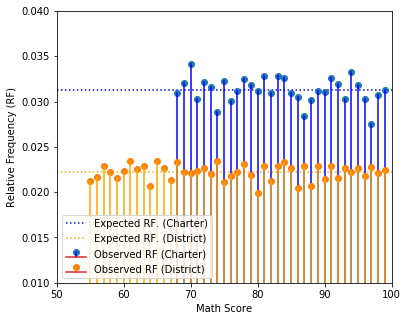

In [5]:
fig, ax = plt.subplots(1)

ax.set_xlim(50,100)
ax.set_ylim(0.01, 0.04)
ax.set_xlabel('Math Score'); ax.set_ylabel('Relative Frequency (RF)')
    
ax.stem(scores[('Charter',)].index, 
           scores[('Charter',)].values/scores[('Charter',)].sum(), 'blue',  label='Observed RF (Charter)')
ax.stem(scores[('District',)].index, 
           scores[('District',)].values/scores[('District',)].sum(), 'orange', markerfmt='C1o',  label='Observed RF (District)')

ax.hlines([ 1/len(scores[('Charter',)].index)], 50, 100, 'blue',  ':', label="Expected RF. (Charter)" )
ax.hlines([ 1/len(scores[('District',)].index)], 50, 100, 'orange', ':', label="Expected RF. (District)" )
ax.legend(loc=3)

fig.set_size_inches(6, 5)

## District Summary

In [6]:
student_frag = lambda students : pd.Series(dict([ \
    ('Mean Math Score',
        students['math_score'].mean()),
    ('Mean Reading Score',
        students['reading_score'].mean()),
    ('Mean Combined Score',
        0.5*(students['math_score'] + students['reading_score']).mean()),
    ('% Passing Math', 
        len(students.loc[ students['math_score'] >= 70.0])/len(students)),
    ('% Passing Reading',
        len(students.loc[ students['reading_score'] >= 70.0])/len(students)),
    ('Mean % Passing',
        0.5*(len(students.loc[ students['math_score'] >= 70.0])/len(students) +
             len(students.loc[ students['reading_score'] >= 70.0])/len(students)))
]))

frag = lambda school :  pd.Series(dict([
    ('Total Schols',
        school['school_name'].count()), 
    ('Total Students',
        school['size'].sum()),
    ('Total Budget', 
        school['budget'].sum()) ]))

district_summary = frag(school_data).append(student_frag(student_data)).to_frame().transpose()

In [7]:
district_summary

,Total Schols,Total Students,Total Budget,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
0,15.0,39170.0,24649428.0,78.985371,81.87784,80.431606,0.749809,0.858055,0.803932


## School Summary

In [8]:
schools = school_data_complete.groupby(
    ['school_name', 'type', 'size', 'budget'])

frag = lambda school: pd.Series(dict([
    ('School Name',
        school['school_name']),
    ('School Type',
        school['type']),
    ('Total Students',
        school['size']),
    ('Total School Budget',
        school['budget']),
    ('Per Student Budget',
        school['budget']/school['size'])
]))

raw_right = schools.apply(student_frag) 
raw_left  = raw_right.index.to_frame().apply(frag, axis=1)

school_summary = pd.merge(raw_left, raw_right, 
                          left_index=True, right_index=True).set_index('School Name')


In [9]:
school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
School Name,,,,,,,,,,
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,79.041198,0.666801,0.819333,0.743067
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,83.518837,0.941335,0.970398,0.955867
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,78.934893,0.659885,0.807392,0.733639
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,78.924425,0.683096,0.792990,0.738043
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,83.584128,0.933924,0.971390,0.952657
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,79.112082,0.667530,0.808630,0.738080
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,83.809133,0.925059,0.962529,0.943794
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,78.906068,0.656839,0.813164,0.735002
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,79.019429,0.660576,0.812224,0.736400


 ## Top Performing Schools (By Mean Passing Rate)

In [10]:
school_summary.sort_values(by='Mean % Passing', ascending=False).head(10)

,School Type,Total Students,Total School Budget,Per Student Budget,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
School Name,,,,,,,,,,
Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,83.518837,0.941335,0.970398,0.955867
Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,83.633639,0.932722,0.973089,0.952905
Pena High School,Charter,962,585858,609.0,83.839917,84.044699,83.942308,0.945946,0.959459,0.952703
Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,83.584128,0.933924,0.971390,0.952657
Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,83.631844,0.938677,0.965396,0.952037
Wright High School,Charter,1800,1049400,583.0,83.682222,83.955000,83.818611,0.933333,0.966111,0.949722
Shelton High School,Charter,1761,1056600,600.0,83.359455,83.725724,83.542589,0.938671,0.958546,0.948609
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,83.809133,0.925059,0.962529,0.943794
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,79.041198,0.666801,0.819333,0.743067


## Bottom Performing Schools (By Mean Passing Rate)

In [11]:
school_summary.sort_values(by='Mean % Passing', ascending=True).head(10)

,School Type,Total Students,Total School Budget,Per Student Budget,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
School Name,,,,,,,,,,
Rodriguez High School,District,3999,2547363,637.0,76.842711,80.744686,78.793698,0.663666,0.802201,0.732933
Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,78.934893,0.659885,0.807392,0.733639
Huang High School,District,2917,1910635,655.0,76.629414,81.182722,78.906068,0.656839,0.813164,0.735002
Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,79.019429,0.660576,0.812224,0.736400
Ford High School,District,2739,1763916,644.0,77.102592,80.746258,78.924425,0.683096,0.792990,0.738043
Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,79.112082,0.667530,0.808630,0.738080
Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,79.041198,0.666801,0.819333,0.743067
Holden High School,Charter,427,248087,581.0,83.803279,83.814988,83.809133,0.925059,0.962529,0.943794
Shelton High School,Charter,1761,1056600,600.0,83.359455,83.725724,83.542589,0.938671,0.958546,0.948609


## Math Scores by Grade

In [13]:
raw = school_data_complete.groupby(['school_name', 'grade']).mean().reset_index()
schools = set(raw['school_name'].values)
math_scores = []
for school in sorted(schools):
    tmp = raw.loc[raw['school_name']==school][['grade', 'math_score']]
    scores = dict(tmp.set_index('grade')['math_score'])
    scores['School Name'] = school
    math_scores.append(  scores )
math_scores = pd.DataFrame(math_scores).set_index('School Name')

In [14]:
math_scores

,10th,11th,12th,9th
School Name,,,,
Bailey High School,76.996772,77.515588,76.492218,77.083676
Cabrera High School,83.154506,82.765560,83.277487,83.094697
Figueroa High School,76.539974,76.884344,77.151369,76.403037
Ford High School,77.672316,76.918058,76.179963,77.361345
Griffin High School,84.229064,83.842105,83.356164,82.044010
Hernandez High School,77.337408,77.136029,77.186567,77.438495
Holden High School,83.429825,85.000000,82.855422,83.787402
Huang High School,75.908735,76.446602,77.225641,77.027251
Johnson High School,76.691117,77.491653,76.863248,77.187857


## Reading Score by Grade 

In [15]:
reading_scores = []
for school in sorted(schools):
    tmp = raw.loc[raw['school_name']==school][['grade', 'reading_score']]
    scores = dict(tmp.set_index('grade')['reading_score'])
    scores['School Name'] = school
    reading_scores.append(  scores )
reading_scores = pd.DataFrame(reading_scores).set_index('School Name')

In [16]:
reading_scores

,10th,11th,12th,9th
School Name,,,,
Bailey High School,80.907183,80.945643,80.912451,81.303155
Cabrera High School,84.253219,83.788382,84.287958,83.676136
Figueroa High School,81.408912,80.640339,81.384863,81.198598
Ford High School,81.262712,80.403642,80.662338,80.632653
Griffin High School,83.706897,84.288089,84.013699,83.369193
Hernandez High School,80.660147,81.396140,80.857143,80.866860
Holden High School,83.324561,83.815534,84.698795,83.677165
Huang High School,81.512386,81.417476,80.305983,81.290284
Johnson High School,80.773431,80.616027,81.227564,81.260714


## Scores by School Spending

In [17]:
# Sample bins. Feel free to create your own bins.
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]

bined_summary = school_summary.copy()
bined_summary['Per Student Budget'] = pd.cut(
    bined_summary['Per Student Budget'], 
    spending_bins, 
    labels=group_names)

del bined_summary['Total School Budget']
del bined_summary['Total Students']
bined_summary = bined_summary.rename(
    columns={
        'Per Student Budget': 'Spending Range (Per Student Budget)' 
    }, 
    index=str)

bined_summary = bined_summary.groupby('Spending Range (Per Student Budget)').mean()

In [18]:
bined_summary

,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
Spending Range (Per Student Budget),,,,,,
<$585,83.455399,83.933814,83.694607,0.934601,0.966109,0.950355
$585-615,83.599686,83.885211,83.742449,0.942309,0.959003,0.950656
$615-645,79.079225,81.891436,80.485330,0.756682,0.861066,0.808874
$645-675,76.997210,81.027843,79.012526,0.661648,0.811340,0.736494


## Scores by School Size

In [19]:
# Sample bins. Feel free to create your own bins.
size_bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

bined_summary = school_summary.copy()
bined_summary['Total Students'] = pd.cut(
    bined_summary['Total Students'], 
    size_bins, 
    labels=group_names)

del bined_summary['Total School Budget']
del bined_summary['Per Student Budget']

bined_summary = bined_summary.rename(
    columns={
        'Total Students': 'School Size' 
    }, 
    index=str)

bined_summary = bined_summary.groupby('School Size').mean()

In [20]:
bined_summary

,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
School Size,,,,,,
Small (<1000),83.821598,83.929843,83.875721,0.935502,0.960994,0.948248
Medium (1000-2000),83.374684,83.864438,83.619561,0.935997,0.967907,0.951952
Large (2000-5000),77.746417,81.344493,79.545455,0.699634,0.827666,0.763650


## Scores by School Type

In [21]:
bined_summary = school_summary.groupby('School Type').mean()
del bined_summary['Per Student Budget']
del bined_summary['Total Students']
del bined_summary['Total School Budget']

In [22]:
bined_summary

,Mean Math Score,Mean Reading Score,Mean Combined Score,% Passing Math,% Passing Reading,Mean % Passing
School Type,,,,,,
Charter,83.473852,83.896421,83.685136,0.936208,0.965865,0.951037
District,76.956733,80.966636,78.961685,0.665485,0.807991,0.736738
